In [1]:
#importing some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#create dataframe and read csv data from github

Titanic = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# first 5 rows from Dataset or write the any number in breacket if you want

Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Last 5 rows from Dataset or write the any number in breacket if you want

Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Checking the number of rows and columns in the dataset

Titanic.shape

(891, 12)

158 = Rows,
12 = Columns

In [6]:
#Checking the columns of the dataset

Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#Getting the information of dataset ( All information about the columns/about your data )

Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Checking the null values

Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Statistical summary of the dataset

Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we see the only 10 column summary. because those are numerical columns.

Country and Region are categorical columns.

## Let's plotting heatmap from null values

<AxesSubplot:>

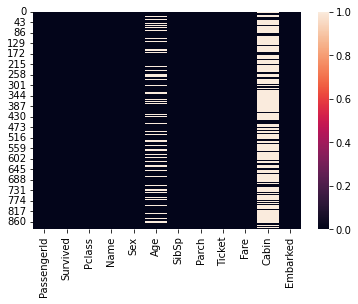

In [10]:
#Lets visualize it using heatmap

sns.heatmap(Titanic.isnull())

### Let's visualize the countplot from survived column

In [11]:
#Checking the value counts of the Survived variables

Titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
Titanic.Survived.value_counts().keys()

Int64Index([0, 1], dtype='int64')

0    549
1    342
Name: Survived, dtype: int64


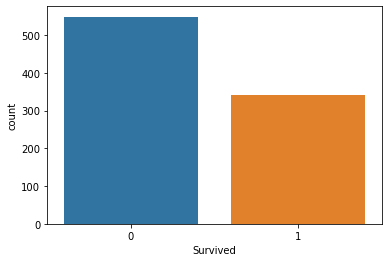

In [13]:
#Visualizing how many passengers are survived and unsurvived    (The passenger survived or not (0 = No; 1 = Yes))

print(Titanic['Survived'].value_counts())
ax = sns.countplot(x='Survived', data=Titanic)
plt.show()

### Let's visualize the males and females passengers using countplot

In [14]:
#Checking the value counts of the Sex variables

Titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
Titanic.Sex.value_counts().keys()

Index(['male', 'female'], dtype='object')

male      577
female    314
Name: Sex, dtype: int64


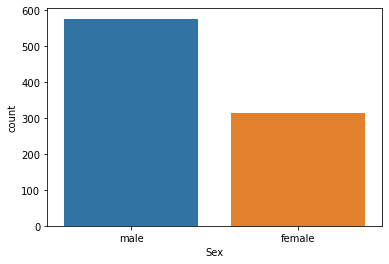

In [16]:
#Visualizing how many Males and female passengers     ( Sex = Male and Female )

print(Titanic['Sex'].value_counts())
ax = sns.countplot(x='Sex', data=Titanic)
plt.show()

### Let's visualize passengers from class using Countplot

In [17]:
#Checking the value counts of the Pclass variables

Titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
Titanic.Pclass.value_counts().keys()

Int64Index([3, 1, 2], dtype='int64')

3    491
1    216
2    184
Name: Pclass, dtype: int64


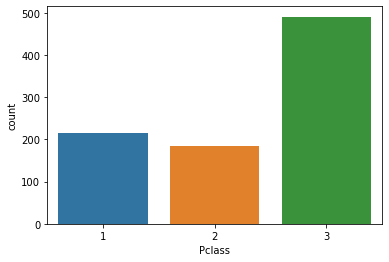

In [19]:
#Visualizing passengers from class    ( Passenger class 1 = 1st; 2 = 2nd; 3 = 3rd)

print(Titanic['Pclass'].value_counts())
ax = sns.countplot(x='Pclass', data=Titanic)
plt.show()

### Let's visualize the survived passengers from class

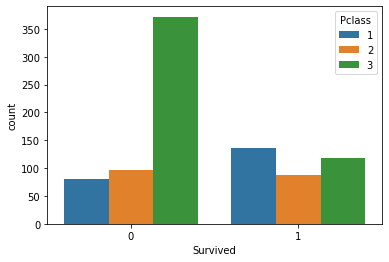

In [20]:
#Visualizing survived passengers from Pclass 

sns.countplot(x="Survived",hue="Pclass", data=Titanic)
plt.show()

## Visualize the histogram for age and fare column

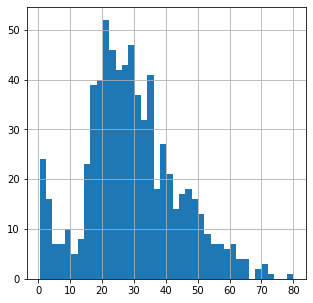

In [21]:
#Visualizing the histogram for Age column

Titanic['Age'].hist(bins = 40, figsize=(5,5))
plt.show()

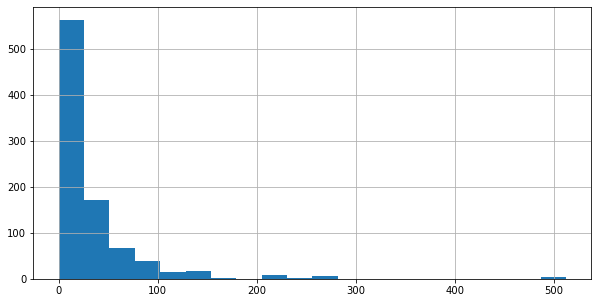

In [22]:
#Visualizing the histogram for Fare column

Titanic['Fare'].hist(bins = 20, figsize=(10,5))
plt.show()

## Now getting the average age from Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

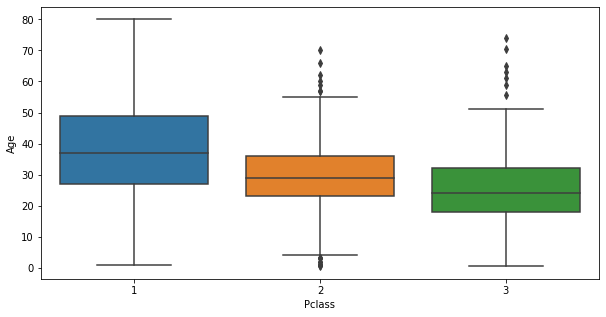

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Pclass', y = 'Age', data = Titanic)

Let's we have average age as:

    1st class ==> 35 to 38
    2nd class ==> 25 to 30
    3rd class ==> 20 to 25

## Let's convert Sex and Embarked columns into numerical column

In [24]:
Titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
Titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
#Now converting categorical columns into numerical columns

Titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


## Filling All Nan Values in Age with Mean of Age

In [27]:
Titanic["Age"].fillna(Titanic["Age"].mean(),inplace=True)

### verifying that Nan Values are Gone

In [28]:
Titanic.Age.isna().sum()

0

### Dropping the Cabin Column because, It contains a lot of Nan Values

In [29]:
Titanic.drop("Cabin", axis=1, inplace=True)

### Dropping the Name, Ticket, Embarked Column's also because, Our Model will only work upon Numerical Data

In [30]:
Titanic.drop(["Name","Ticket","Embarked"], axis=1, inplace=True)

## Now dropping unnecessary columns and seprating the variables into x and y

In [31]:
x = Titanic[["PassengerId","Pclass","Age","SibSp","Parch","Fare","Sex"]]
y = Titanic['Survived']

In [32]:
#Print x

x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex
0,1,3,22.000000,1,0,7.2500,0
1,2,1,38.000000,1,0,71.2833,1
2,3,3,26.000000,0,0,7.9250,1
3,4,1,35.000000,1,0,53.1000,1
4,5,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0
887,888,1,19.000000,0,0,30.0000,1
888,889,3,29.699118,1,2,23.4500,1
889,890,1,26.000000,0,0,30.0000,0


In [33]:
#Print y

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting the data into train and test

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

print("X shape: ", x.shape)
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("Y_train shape: ", y_train.shape)
print("Y_test shape: ", y_test.shape)

X shape:  (891, 7)
X_train shape:  (623, 7)
X_test shape:  (268, 7)
Y_train shape:  (623,)
Y_test shape:  (268,)


In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy is:-", accuracy_score(y_test,pred_test)*100)

At random state 15 The model performs very well
At random state:- 15
Training accuracy is:- 79.91573033707866
Testing accuracy is:- 79.88826815642457
At random state 154 The model performs very well
At random state:- 154
Training accuracy is:- 79.91573033707866
Testing accuracy is:- 79.88826815642457
At random state 286 The model performs very well
At random state:- 286
Training accuracy is:- 79.91573033707866
Testing accuracy is:- 79.88826815642457
At random state 370 The model performs very well
At random state:- 370
Training accuracy is:- 79.91573033707866
Testing accuracy is:- 79.88826815642457
At random state 377 The model performs very well
At random state:- 377
Training accuracy is:- 79.91573033707866
Testing accuracy is:- 79.88826815642457
At random state 592 The model performs very well
At random state:- 592
Training accuracy is:- 79.91573033707866
Testing accuracy is:- 79.88826815642457
At random state 675 The model performs very well
At random state:- 675
Training accuracy i

### Now predict the survival

In [36]:
survival_predict = lr.predict(x_test)

## Evalution

In [37]:
from sklearn.metrics import classification_report

In [38]:
# using actual testing data and the predictions our Model just made
print(classification_report(y_test, survival_predict )) # getting accuracy

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       115
           1       0.78      0.55      0.64        64

    accuracy                           0.78       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.78      0.78      0.77       179



In [39]:
# for making a DataFrame shape must be same
pred = lr.predict(x)

In [40]:
pred.shape

(891,)

In [41]:
x.shape

(891, 7)

In [42]:
# making our own DataFrame with 'Submission' as Name
submission = pd.DataFrame({
    'PassengerId' : x['PassengerId'],
    'Survived' : pred
})

In [43]:
submission.head

<bound method NDFrame.head of      PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         1
889          890         1
890          891         0

[891 rows x 2 columns]>